<a href="https://colab.research.google.com/github/piyush1856/maths-for-machine-learning/blob/main/Perceptron_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
x,y=datasets.make_blobs(n_samples=200,
                   n_features=2,
                   centers=[[2,2],[6,6]],
                   center_box=(0,10),
                   cluster_std=1)

In [11]:
# Converting this label as -1 to ensure the positive and negative class
y[y==0]=-1

In [12]:
# This is just a show function to visualize how algorithms is working (to see the hyperplane between the two classes we want to classify)

def show(w, w0, x, y):
    # Generate a range of x values for plotting the decision boundary line.
    # np.linspace creates an array of evenly spaced values between -5 and 10.
    x_val = np.linspace(-5, 10)

    # Compute the corresponding y values for the decision boundary line.
    # Using the line equation: w1*x1 + w2*x2 + w0 = 0, solve for x2:
    # x2 = (-w1 * x1 - w0) / w2, where w[0] = w1, w[1] = w2.
    y_val = (-w[0] * x_val - w0) / w[1]

    # Plot the decision boundary as a line.
    plt.plot(x_val, y_val, label='Decision Boundary')

    # Create a scatter plot of the data points.
    # x[:, 0] refers to the first feature (x-coordinates of data points),
    # and x[:, 1] refers to the second feature (y-coordinates of data points).
    # The 'c' parameter uses the labels 'y' to color the points based on their class.
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolors='k', label='Data Points')

    # Set the limits for the x-axis to focus on the data range,
    # with a small margin (+0.2) to avoid cutting off any points.
    plt.xlim(x[:, 0].min() - 0.2, x[:, 0].max() + 0.2)

    # Set the limits for the y-axis similarly.
    plt.ylim(x[:, 1].min() - 0.2, x[:, 1].max() + 0.2)

    # Add labels and a legend to the plot for better readability.
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Display the plot, which will show the decision boundary and the data points.
    plt.show()


In [13]:
# Step 1 of Perceptron Learning Algorithm : defining / initializing  a random weight vetor and the w0
w=np.random.normal(size=(2,))
w0=np.random.normal()
print(w,w0)
print(w[0],w[1],w0)

[ 1.3522786  -0.35341707] -0.5813608358856237
1.3522786016924817 -0.3534170685466553 -0.5813608358856237


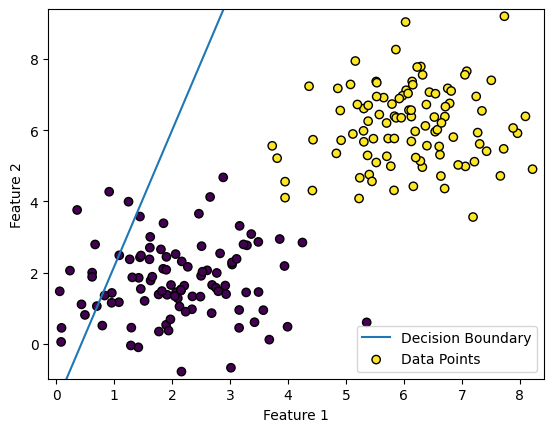

In [14]:
show(w,w0,x,y)

In [15]:
def dist_of_point_from_hyperplane(w, w0, x):
    # Calculate the distance 'd' of point 'x' from the hyperplane.
    # The formula used is: d = (w.x + w0) / ||w||
    # np.dot(w, x) computes the dot product of the weight vector 'w' and the point 'x'.
    # w0 is the bias term of the hyperplane.
    # np.linalg.norm(w) calculates the Euclidean norm (magnitude) of the weight vector 'w'.
    d = (np.dot(w, x) + w0) / np.linalg.norm(w)

    # Return the calculated distance.
    return d


In [16]:
# Function to train the perceptron model.
def perceptron_training(x, y, w, w0, num_iter=100):
    # Iterate for a specified number of iterations (default is 100).
    for i in range(num_iter):
        print("Iteration Number:", i + 1)

        # Initialize a counter for the number of misclassified points in each iteration.
        miss_classified_points = 0

        # Loop through each training example (xi, yi), where xi is the feature vector, and yi is the label.
        for (xi, yi) in zip(x, y):
            # Calculate the signed distance of point xi from the hyperplane using the existing weights and bias.
            d = dist_of_point_from_hyperplane(w, w0, xi)

            # Get the predicted label using the sign of the distance.
            hs = np.sign(d)  # Returns +1 if the distance is positive, -1 if negative.

            # Check if the predicted label (hs) matches the actual label (yi).
            # If they don't match, the point is misclassified.
            if hs != np.sign(yi):
                miss_classified_points += 1  # Increment the count of misclassified points.

                # Update the weights and bias using the Perceptron rule:
                # w = w + (xi * yi)
                w = w + (xi * yi)

                # Update the bias term w0 using the sign of the actual label yi.
                w0 = w0 + np.sign(yi)

        # Print the current accuracy based on the percentage of correctly classified points.
        current_accuracy = 100 - (100 * miss_classified_points / len(y))
        print(f"Current Accuracy: {current_accuracy}%")

        # Print the current values of the weights and bias.
        print(f"Weights are W1: {w[0]}, W2: {w[1]}, W0: {w0}")

        # Visualize the updated decision boundary and the data points.
        show(w, w0, x, y)

        # If no points were misclassified, the training is complete, and we can return the final weights.
        if miss_classified_points == 0:
            return w, w0

    # If the maximum number of iterations is reached and the training hasn't converged,
    # return the final weights and bias.
    return w, w0

Iteration Number: 1
Current Accuracy: 75.0%
Weights are W1: 6.609615547421331, W2: 3.112143333593261, W0: -22.581360835885626


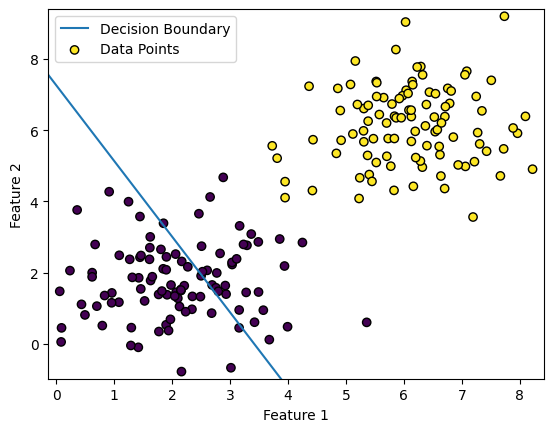

Iteration Number: 2
Current Accuracy: 88.5%
Weights are W1: 4.637186833518726, W2: 8.367898800697645, W0: -29.581360835885626


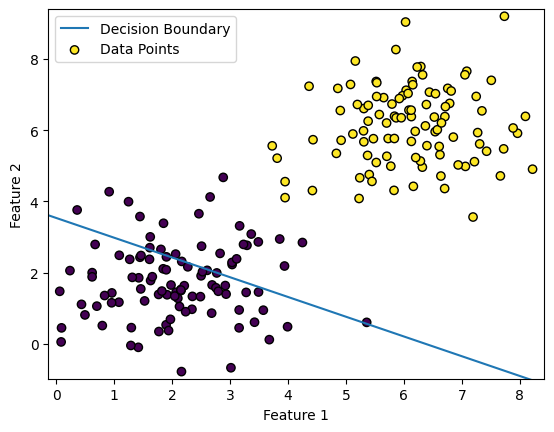

Iteration Number: 3
Current Accuracy: 94.5%
Weights are W1: 5.237407333046953, W2: 6.851905707523436, W0: -32.581360835885626


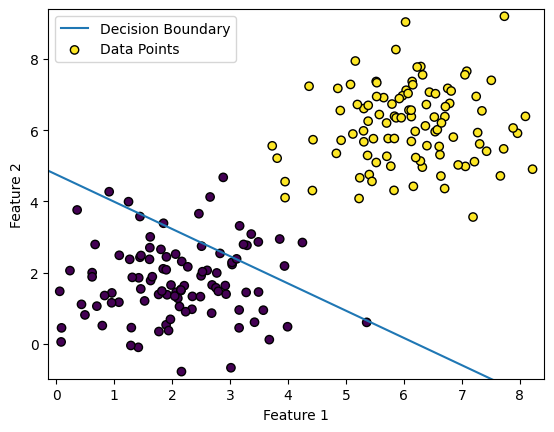

Iteration Number: 4
Current Accuracy: 97.5%
Weights are W1: 6.936862427223735, W2: 9.328588020135474, W0: -33.581360835885626


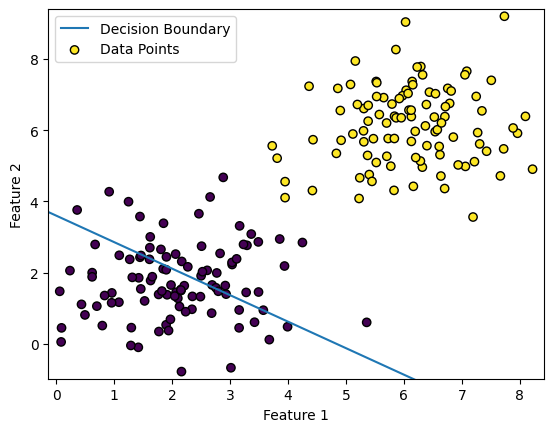

Iteration Number: 5
Current Accuracy: 98.0%
Weights are W1: 4.463697675562916, W2: 5.519801522393863, W0: -35.581360835885626


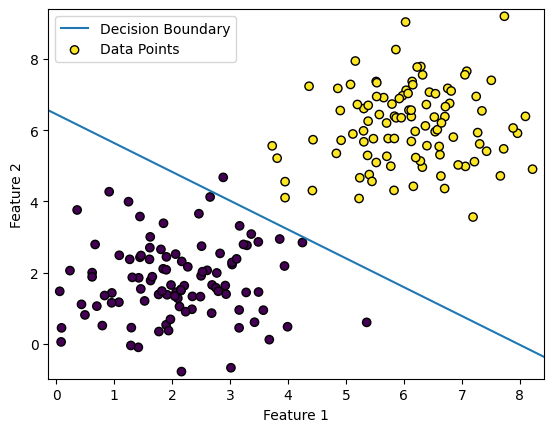

Iteration Number: 6
Current Accuracy: 98.5%
Weights are W1: 4.644387534896067, W2: 5.837071774082556, W0: -36.581360835885626


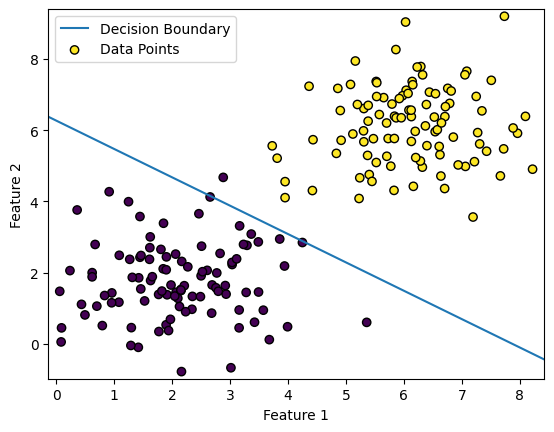

Iteration Number: 7
Current Accuracy: 98.5%
Weights are W1: 4.825077394229218, W2: 6.15434202577125, W0: -37.581360835885626


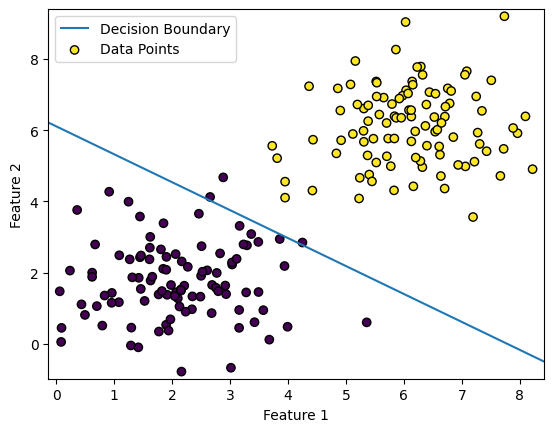

Iteration Number: 8
Current Accuracy: 91.5%
Weights are W1: 6.346079012145971, W2: 10.714523145233237, W0: -42.581360835885626


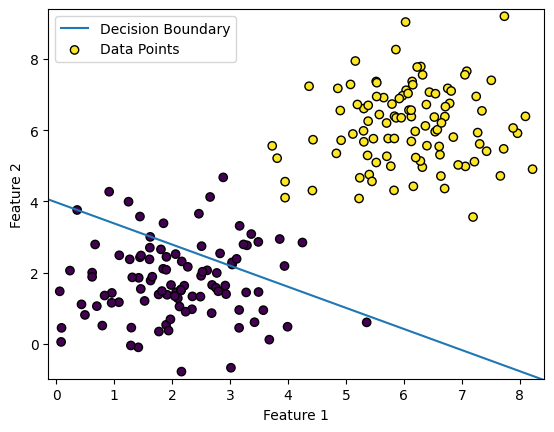

Iteration Number: 9
Current Accuracy: 99.0%
Weights are W1: 7.640362825243475, W2: 10.69536628538582, W0: -42.581360835885626


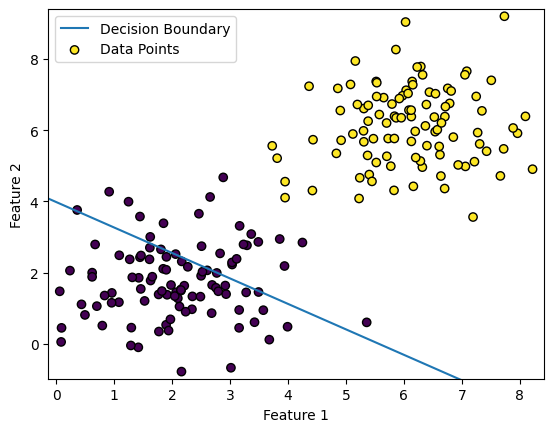

Iteration Number: 10
Current Accuracy: 98.0%
Weights are W1: 5.1671980735826555, W2: 6.886579787644209, W0: -44.581360835885626


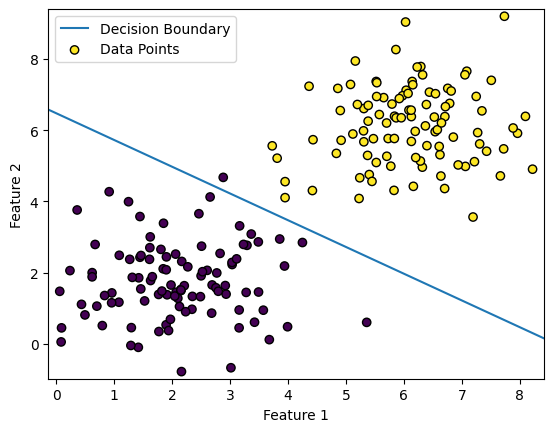

Iteration Number: 11
Current Accuracy: 98.5%
Weights are W1: 5.347887932915807, W2: 7.203850039332902, W0: -45.581360835885626


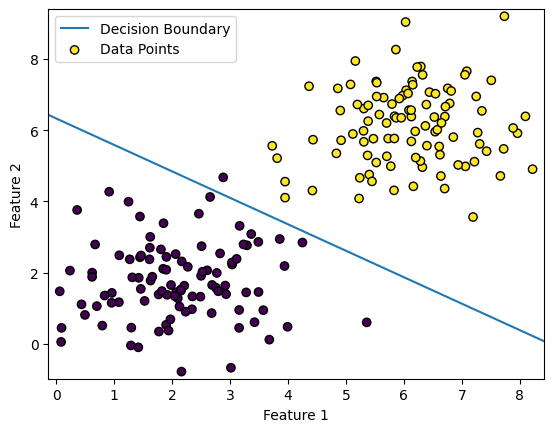

Iteration Number: 12
Current Accuracy: 98.5%
Weights are W1: 5.5285777922489565, W2: 7.521120291021596, W0: -46.581360835885626


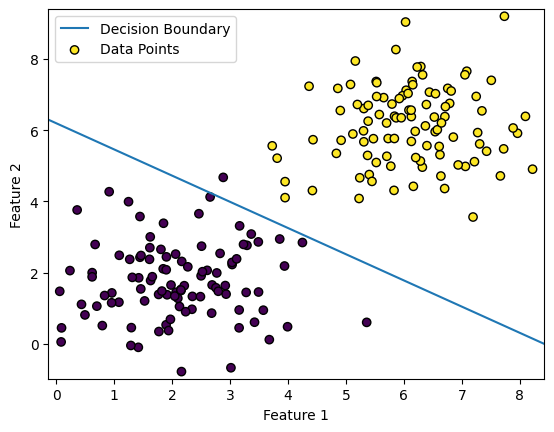

Iteration Number: 13
Current Accuracy: 98.5%
Weights are W1: 5.709267651582106, W2: 7.83839054271029, W0: -47.581360835885626


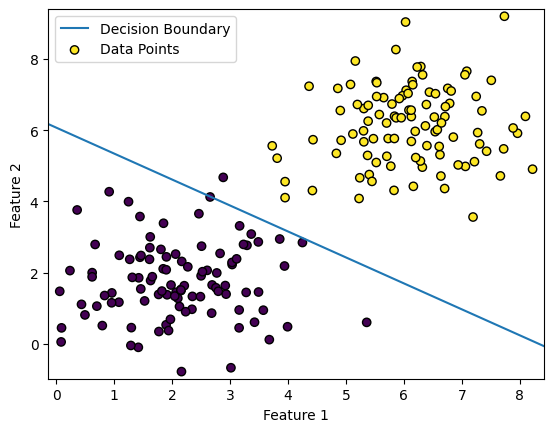

Iteration Number: 14
Current Accuracy: 98.5%
Weights are W1: 5.889957510915256, W2: 8.155660794398983, W0: -48.581360835885626


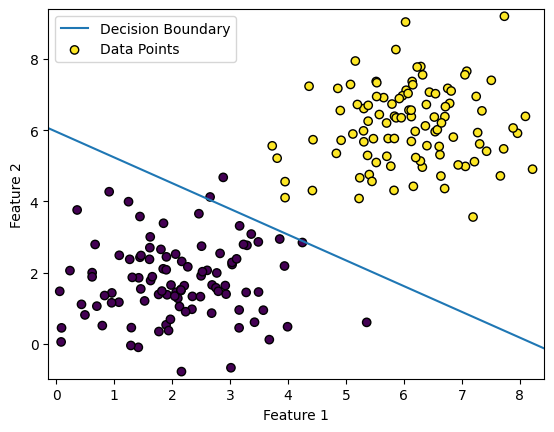

Iteration Number: 15
Current Accuracy: 94.0%
Weights are W1: 4.6618417004117845, W2: 10.129372168329098, W0: -52.581360835885626


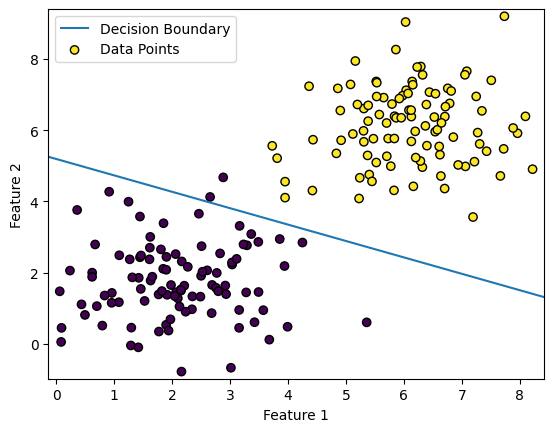

Iteration Number: 16
Current Accuracy: 97.0%
Weights are W1: 7.07117152274574, W2: 8.709091268730727, W0: -54.581360835885626


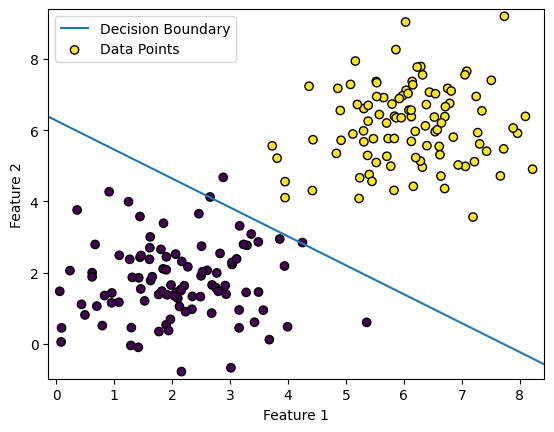

Iteration Number: 17
Current Accuracy: 98.0%
Weights are W1: 9.260720980248667, W2: 11.851302338480394, W0: -54.581360835885626


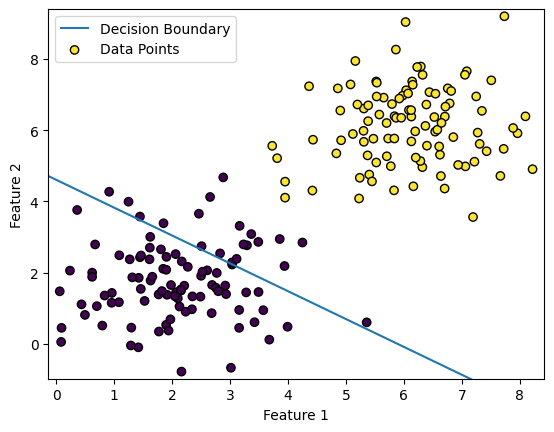

Iteration Number: 18
Current Accuracy: 99.5%
Weights are W1: 6.606866369254697, W2: 7.72524558905009, W0: -55.581360835885626


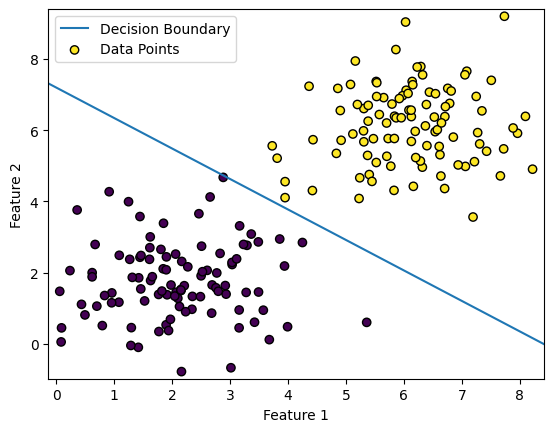

Iteration Number: 19
Current Accuracy: 100.0%
Weights are W1: 6.606866369254697, W2: 7.72524558905009, W0: -55.581360835885626


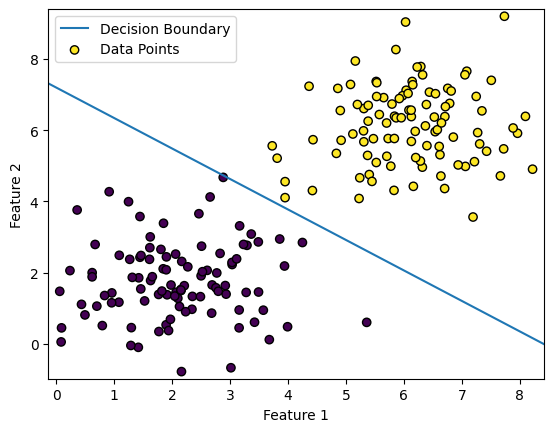

In [17]:
w,wo=perceptron_training(x,y,w,w0)